In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
#!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.7 MB/s eta 0:00:00


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Datasets/movie_success_rate.csv')

In [ ]:
df.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

In [ ]:
df['Title'].nunique()

837

In [ ]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
count,838.000000,838.00000,838.000000,839.00000,8.390000e+02,839.000000,838.000000,838.000000,838.000000,838.000000,...,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.81432,1.932303e+05,84.564558,59.575179,0.330549,0.291169,0.053699,...,0.023866,0.005967,0.102625,0.143198,0.127685,0.017900,0.176611,0.011933,0.004773,0.177804
std,286.572065,3.17236,18.470922,0.87723,1.929838e+05,104.457845,16.952416,0.470692,0.454573,0.225558,...,0.152724,0.077059,0.303650,0.350484,0.333938,0.132666,0.381567,0.108650,0.068965,0.382576
min,1.000000,2006.00000,66.000000,1.90000,1.780000e+02,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.250000,2010.00000,101.000000,6.30000,6.145500e+04,13.975000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,475.500000,2013.00000,112.000000,6.90000,1.371170e+05,48.240000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,729.750000,2015.00000,124.000000,7.50000,2.708650e+05,116.730000,72.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,2016.00000,187.000000,9.00000,1.791916e+06,936.630000,100.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
value_counts = df['Success'].value_counts().reset_index()
value_counts.columns = ['Success', 'Count']
fig = px.bar(value_counts, x='Success', y='Count')
fig.update_layout(
    title='movie is succes or not',
    xaxis_title='Values',
    yaxis_title='Count'
)
fig.show()

data is imbalanced and even if i train any model on this i will get biased output hence i will perform overflow technique like smote to balance the dataset.

<ipython-input-32-5fe689b65209>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

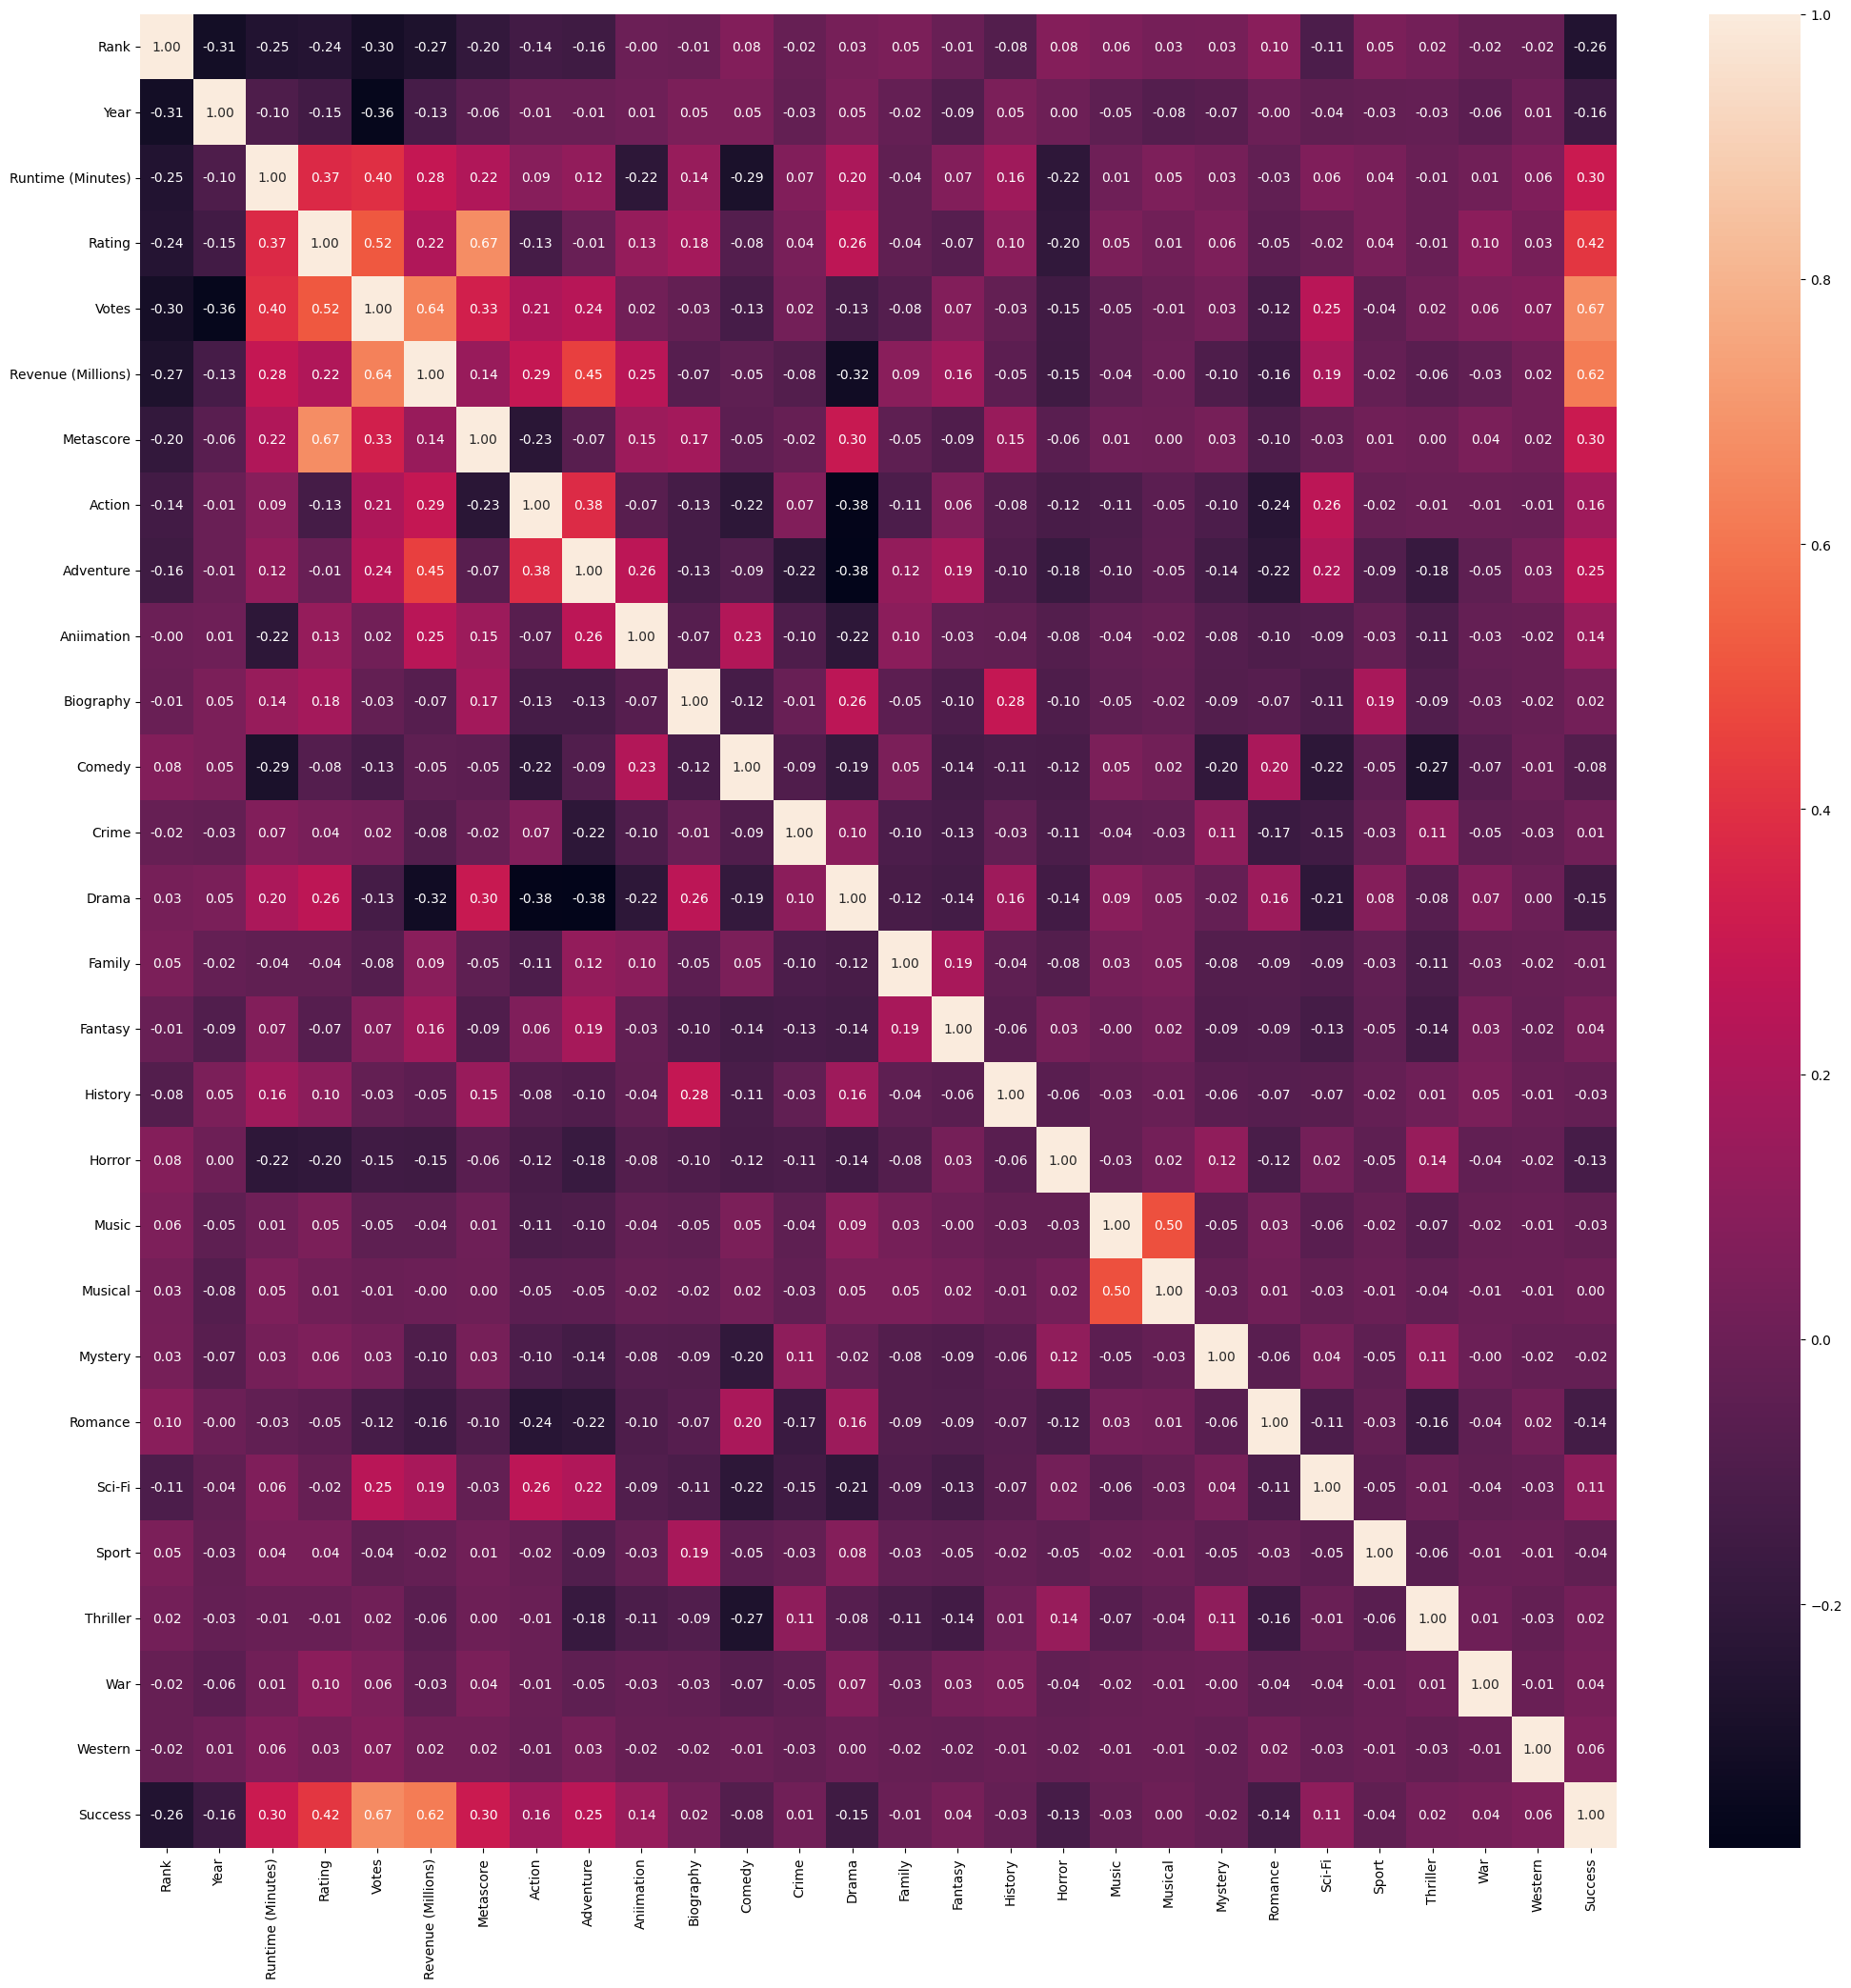

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), annot = True, fmt='.2f')

In [ ]:
columns_to_drop = ['Rank', 'Title','Genre','Description','Musical','Actors','Director']

df = df.drop(columns_to_drop, axis=1)

In [ ]:
df.isnull().sum()

Year                  1
Runtime (Minutes)     1
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             1
Action                1
Adventure             1
Aniimation            1
Biography             1
Comedy                1
Crime                 1
Drama                 1
Family                1
Fantasy               1
History               1
Horror                1
Music                 1
Mystery               1
Romance               1
Sci-Fi                1
Sport                 1
Thriller              1
War                   1
Western               1
Success               1
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
Action                0
Adventure             0
Aniimation            0
Biography             0
Comedy                0
Crime                 0
Drama                 0
Family                0
Fantasy               0
History               0
Horror                0
Music                 0
Mystery               0
Romance               0
Sci-Fi                0
Sport                 0
Thriller              0
War                   0
Western               0
Success               0
dtype: int64

In [ ]:
# Separate the features (X) and the target variable (y)
X = df.drop('Success', axis=1)
y = df['Success']

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
bdf = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
value_counts = bdf['Success'].value_counts().reset_index()
value_counts.columns = ['Success', 'Count']
fig = px.bar(value_counts, x='Success', y='Count')
fig.update_layout(
    title='movie is succes or not',
    xaxis_title='Values',
    yaxis_title='Count'
)
fig.show()

In [ ]:
# Separate the features (X) and the target variable (y)
X = bdf.drop('Success', axis=1)
y = bdf['Success']

# Perform the test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the sizes of the train and test sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 964
Testing set size: 414


In [ ]:
# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and fit the logistic regression model
logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)

Accuracy: 0.9251207729468599
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.89      0.93       226
         1.0       0.88      0.96      0.92       188

    accuracy                           0.93       414
   macro avg       0.92      0.93      0.92       414
weighted avg       0.93      0.93      0.93       414



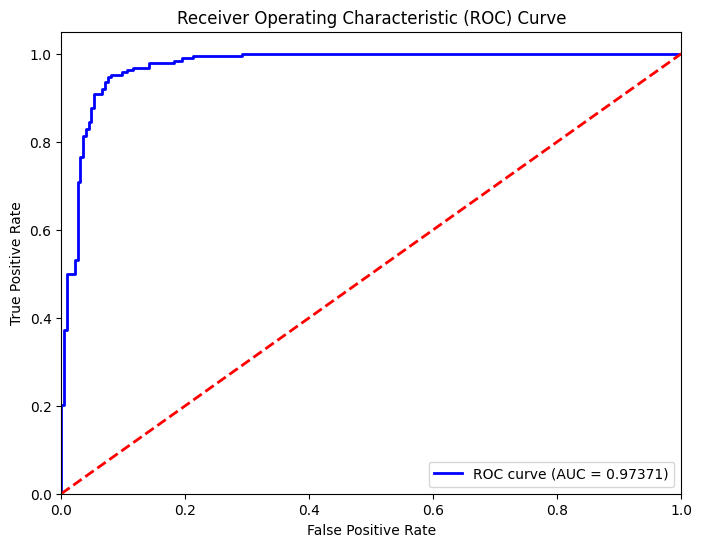

AUC: 0.9737102240632649


In [ ]:
# Predict probabilities for the positive class
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC value
print("AUC:", roc_auc)

# Random Forest Classifier

In [ ]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']  # Explicitly set max_features='sqrt'
}

# Perform grid search cross-validation for parameter tuning
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter combination
best_params = grid_search.best_params_

# Initialize the Random Forest classifier with the best parameters
random_forest = RandomForestClassifier(random_state=42, **best_params)

# Fit the model on the training data
random_forest.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9951690821256038
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       226
         1.0       1.00      0.99      0.99       188

    accuracy                           1.00       414
   macro avg       1.00      0.99      1.00       414
weighted avg       1.00      1.00      1.00       414



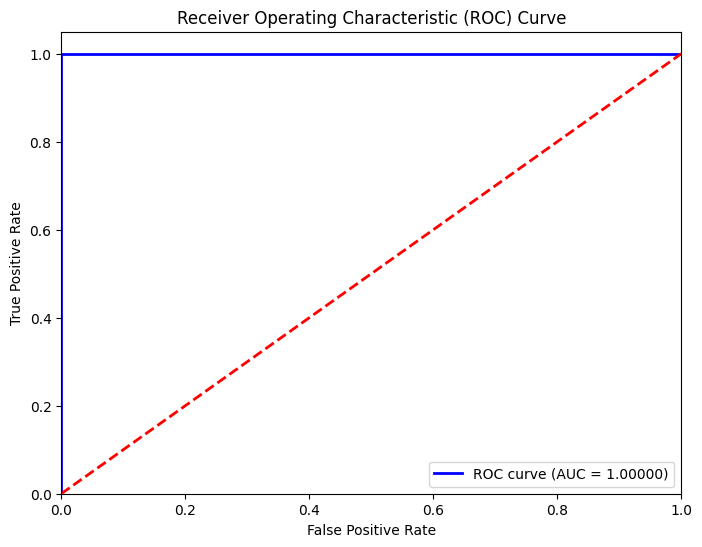

AUC: 1.0


In [ ]:
# Predict probabilities for the positive class
y_prob = random_forest.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC value
print("AUC:", roc_auc)

# SVM Classifier

In [ ]:
# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
}

# Perform grid search cross-validation for parameter tuning
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter combination
best_params = grid_search.best_params_

# Initialize the SVM classifier with the best parameters
svm = SVC(kernel='rbf',probability=True, random_state=42, **best_params)

# Fit the model on the training data
svm.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)

Best Parameters: {'C': 1, 'gamma': 'scale'}
Accuracy: 0.9468599033816425
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       226
         1.0       0.92      0.96      0.94       188

    accuracy                           0.95       414
   macro avg       0.95      0.95      0.95       414
weighted avg       0.95      0.95      0.95       414



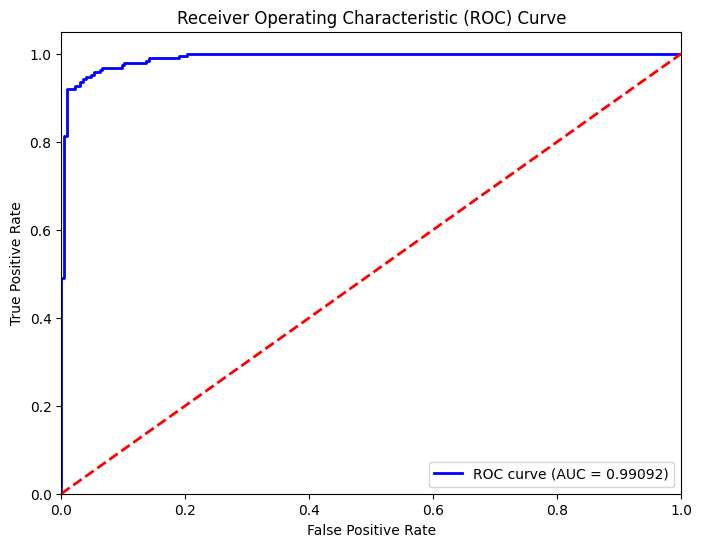

AUC: 0.9909150819054793


In [ ]:
# Predict probabilities for the positive class
y_prob = svm.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC value
print("AUC:", roc_auc)

# Light GBM Classifier

In [ ]:
# Define the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'num_leaves': [15, 31, 50],
    'max_depth': [5, 10, -1],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 500]
}

# Perform grid search cross-validation for parameter tuning
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter combination
best_params = grid_search.best_params_

# Initialize the LightGBM classifier with the best parameters
lgb_model = lgb.LGBMClassifier(random_state=42, **best_params)

# Fit the model on the training data
lgb_model.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = lgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 15}
Accuracy: 0.9975845410628019
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       226
         1.0       1.00      0.99      1.00       188

    accuracy                           1.00       414
   macro avg       1.00      1.00      1.00       414
weighted avg       1.00      1.00      1.00       414



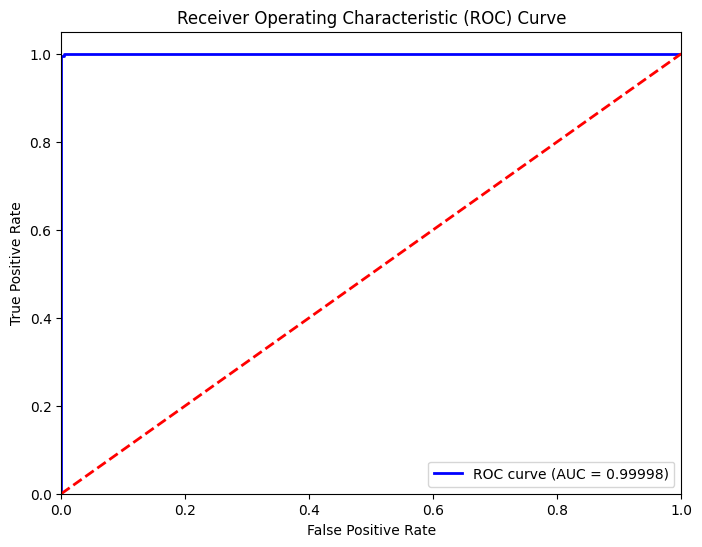

AUC: 0.9999764639427603


In [ ]:
# Predict probabilities for the positive class
y_prob = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC value
print("AUC:", roc_auc)

# Cat Boost Classifier

In [ ]:
# Define the CatBoost classifier
catboost = CatBoostClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform grid search cross-validation for parameter tuning
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter combination
best_params = grid_search.best_params_

# Initialize the CatBoost classifier with the best parameters
catboost = CatBoostClassifier(random_state=42, **best_params)

# Fit the model on the training data
catboost.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = catboost.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)

Streaming output truncated to the last 5000 lines.
12:	learn: 0.0688392	total: 85.6ms	remaining: 3.21s
13:	learn: 0.0592657	total: 91.3ms	remaining: 3.17s
14:	learn: 0.0534486	total: 97.6ms	remaining: 3.15s
15:	learn: 0.0488220	total: 104ms	remaining: 3.15s
16:	learn: 0.0426070	total: 110ms	remaining: 3.13s
17:	learn: 0.0380406	total: 116ms	remaining: 3.1s
18:	learn: 0.0353565	total: 122ms	remaining: 3.08s
19:	learn: 0.0328137	total: 127ms	remaining: 3.06s
20:	learn: 0.0292212	total: 133ms	remaining: 3.03s
21:	learn: 0.0273860	total: 139ms	remaining: 3.01s
22:	learn: 0.0257493	total: 144ms	remaining: 2.99s
23:	learn: 0.0241790	total: 150ms	remaining: 2.97s
24:	learn: 0.0226249	total: 155ms	remaining: 2.95s
25:	learn: 0.0212088	total: 161ms	remaining: 2.93s
26:	learn: 0.0201854	total: 166ms	remaining: 2.91s
27:	learn: 0.0189540	total: 172ms	remaining: 2.89s
28:	learn: 0.0181501	total: 177ms	remaining: 2.87s
29:	learn: 0.0174579	total: 182ms	remaining: 2.85s
30:	learn: 0.0167702	total: 1

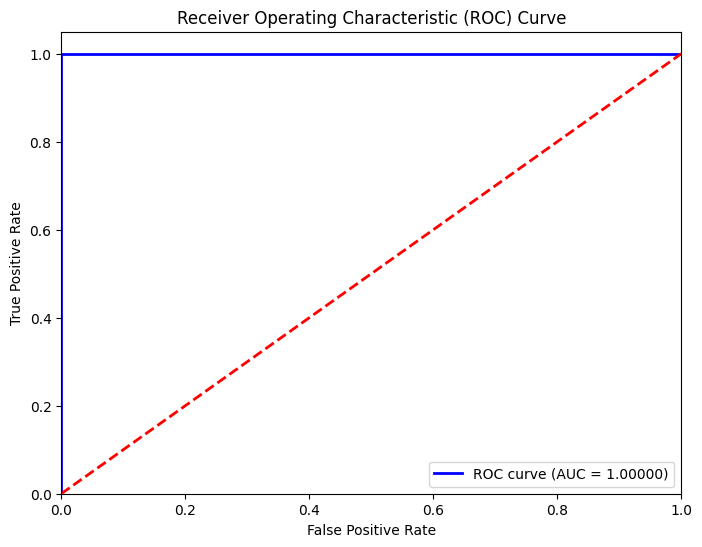

AUC: 1.0


In [ ]:
# Predict probabilities for the positive class
y_prob = catboost.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC value
print("AUC:", roc_auc)